In [1]:
from eaaw_graphlime_utils import *
import gc

import seaborn as sns
import seaborn.objects as so


from   pcgrad.pcgrad import PCGrad # from the following: https://github.com/WeiChengTseng/Pytorch-PCGrad. Renamed to 'pcgrad' and moved to site-packages folder.

import pandas as pd

# torch.manual_seed(2)

ScalarFunction


In [2]:
dataset_name='computers'
if dataset_attributes[dataset_name]['single_or_multi_graph']=='single':
    dataset = prep_data(dataset_name=dataset_name, location='default', batch_size='default', transform_list='default',
                        train_val_test_split=[0.9,0.05,0.05])
    graph_to_watermark = data = dataset[0]
elif dataset_attributes[dataset_name]['single_or_multi_graph']=='multi':
    [train_dataset, val_dataset, test_dataset], [train_loader, val_loader, test_loader] = prep_data(dataset_name=dataset_name, location='default', 
                                                                                                    batch_size='default', transform_list='default',
                                                                                                                            train_val_test_split=[0.9,0.05,0.05])
    graph_to_watermark = train_dataset[0]

Transorms used when loading computers: ['CreateMaskTransform()']
train_mask: 12376
test_mask: 689
val_mask: 687


In [15]:
#optimization_kwargs, node_classifier_kwargs, watermark_kwargs, subgraph_kwargs, augment_kwargs, watermark_loss_kwargs, regression_kwargs = get_presets(dataset, 'default')
get_presets(dataset,dataset_name)

compare_unimportant_against_random=False

config.node_classifier_kwargs['dropout']=0
config.node_classifier_kwargs['dropout_subgraphs']=0
config.watermark_kwargs['fancy_selection_kwargs']['clf_only_epochs'] = 20
config.optimization_kwargs['lr']=0.002
config.optimization_kwargs['epochs']=100
# config.optimization_kwargs['coefWmk']=300

config.optimization_kwargs['coefWmk_kwargs']= {
                                                'coefWmk':15,
                                                'schedule_coef_wmk': False,
                                                'min_coefWmk_scheduled': 100,
                                                'reach_max_coef_wmk_by_epoch':70,
                                                }

config.optimization_kwargs['use_pcgrad']=True
config.optimization_kwargs['use_sam']=False
config.optimization_kwargs['sam_momentum']=0.5
config.optimization_kwargs['sam_rho']=1e-5


config.optimization_kwargs['use_gradnorm']=False


config.augment_kwargs['nodeDrop']['use']=False
config.augment_kwargs['nodeMixUp']['use']=True
config.augment_kwargs['nodeFeatMask']['use']=False
config.augment_kwargs['edgeDrop']['use']=False
config.augment_kwargs['separate_trainset_from_subgraphs'] = True
config.augment_kwargs['ignore_subgraphs'] = True
config.watermark_kwargs['fancy_selection_kwargs']['percent_of_features_to_watermark']=1
config.watermark_kwargs['watermark_type']='fancy'
config.subgraph_kwargs['numSubgraphs']=4
config.subgraph_kwargs['fraction']=0.01
config.subgraph_kwargs['method']='khop'
config.optimization_kwargs['sacrifice_kwargs']['method']='subgraph_node_indices'
config.optimization_kwargs['sacrifice_kwargs']['percentage']=1
config.optimization_kwargs['separate_forward_passes_per_subgraph']=True
config.optimization_kwargs['clf_only']=False
config.watermark_loss_kwargs['epsilon']=1e-2

config.regression_kwargs['lambda']=1e-4

validate_kwargs()


In [16]:
merged_dict = merge_kwargs_dicts()#config.node_classifier_kwargs, config.optimization_kwargs, config.watermark_kwargs, config.subgraph_kwargs, config.regression_kwargs, config.watermark_loss_kwargs, config.augment_kwargs)
merged_dict_keys = list(merged_dict.keys()) + ['Train Acc','Val Acc','Match Rates','Final Betas','watermark']
all_dfs = pd.DataFrame(dict(zip(merged_dict_keys,[]*len(merged_dict_keys))))

# all_dfs = pickle.load(open('/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/src/results_df.pkl','rb'))
# all_results = {}



scale_beta_method=None
debug_multiple_subgraphs=False



setup_subgraph_dict
nodeIndices: [122, 998, 1784, 2215, 2253, 3366, 3480, 3875, 4100, 4613, 4739, 5041, 5713, 6026, 7203, 7920, 8210, 9010, 9244, 9674, 9717, 10138, 10408, 10416, 10901, 10941, 11570, 11701, 12729, 13094]
nodeIndices: [52, 227, 421, 692, 1168, 1243, 2316, 2611, 3009, 3139, 3924, 5250, 5709, 6013, 6152, 6365, 6561, 6885, 8214, 8376, 8528, 9986, 10307, 10770, 11047, 11118, 11598, 12337, 12888, 13529]
nodeIndices: [473, 1322, 1549, 1600, 1629, 2179, 3170, 3659, 3896, 4153, 4531, 4545, 4722, 4862, 5405, 5750, 6314, 6425, 6934, 9446, 9982, 10611, 10682, 10979, 11136, 12189, 12758, 12836, 13155, 13508]
nodeIndices: [505, 872, 1425, 1502, 1524, 1891, 3880, 4257, 4528, 5060, 5810, 6120, 6544, 6946, 7168, 7439, 7933, 7984, 8266, 8460, 8841, 9022, 9585, 9697, 11001, 11328, 12592, 12850, 13346, 13646]
Sacrificing 100% of subgraph nodes from node classification training


  0%|          | 0/100 [00:00<?, ?it/s]

backward
Epoch:   0, loss_primary = 5.370, loss_watermark = n/a, B*W = n/a, train acc = 0.074, val acc = 0.087
backward
Epoch:   1, loss_primary = 5.425, loss_watermark = n/a, B*W = n/a, train acc = 0.483, val acc = 0.492
backward
Epoch:   2, loss_primary = 7.199, loss_watermark = n/a, B*W = n/a, train acc = 0.476, val acc = 0.437
backward
Epoch:   3, loss_primary = 5.052, loss_watermark = n/a, B*W = n/a, train acc = 0.533, val acc = 0.537
backward
Epoch:   4, loss_primary = 2.807, loss_watermark = n/a, B*W = n/a, train acc = 0.581, val acc = 0.592
backward
Epoch:   5, loss_primary = 2.376, loss_watermark = n/a, B*W = n/a, train acc = 0.626, val acc = 0.613
backward
Epoch:   6, loss_primary = 1.953, loss_watermark = n/a, B*W = n/a, train acc = 0.663, val acc = 0.658
backward
Epoch:   7, loss_primary = 1.863, loss_watermark = n/a, B*W = n/a, train acc = 0.722, val acc = 0.687
backward
Epoch:   8, loss_primary = 1.736, loss_watermark = n/a, B*W = n/a, train acc = 0.742, val acc = 0.731
b

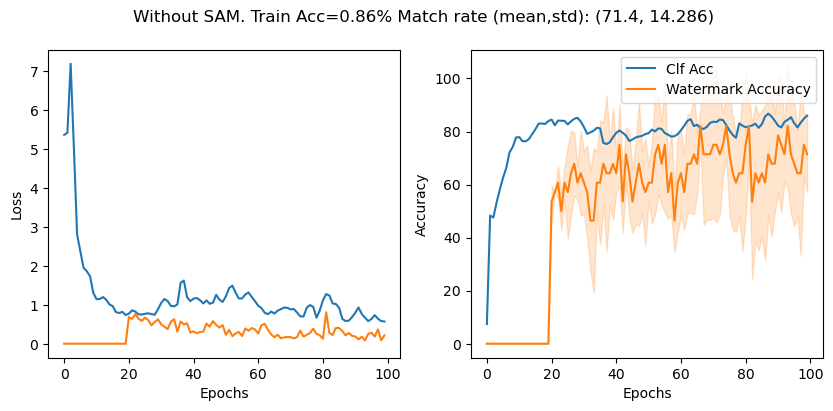

In [17]:
# for mom in [1e-3, 1e-2, 1e-1, 0.5]:
#     for rho in [1e-7,1e-5,1e-3]:
# config.optimization_kwargs['sam_momentum'] = mom
# config.optimization_kwargs['sam_rho'] = rho
# for i in range(10):
#     if i<5:
#         config.optimization_kwargs['use_sam']=True
#         title = f'With SAM - momentum={np.round(config.optimization_kwargs['sam_momentum'],3)}, rho={config.optimization_kwargs['sam_rho']}'
#     else:
# config.optimization_kwargs['use_sam']=False
title = f'Without SAM'
Trainer_ = Trainer(data, dataset_name)
node_classifier, history, subgraph_dict, \
all_feature_importances, all_watermark_indices, probas = Trainer_.train(debug_multiple_subgraphs=True, save=True, print_every=1, perturb=False, perturb_lr=1e-3)

primary_loss_curve, watermark_loss_curve, final_betas, watermarks, \
percent_matches, percent_match_mean, percent_match_std, \
    primary_acc_curve, watermark_acc_curve, train_acc, val_acc = get_performance_trends(history, subgraph_dict)

final_plot(history, title, percent_matches, primary_loss_curve, watermark_loss_curve, train_acc)  

In [ ]:

''' (individualize boolean, multisubgraph method, index selection method) '''
selection_kwargss = [#(False, None, 'random'), # random, not individualized
                    (False,'average','unimportant'), # average, not individualized
                    #(False,'concat','unimportant'), # concat, not inividualized
                    # (True,None,'unimportant') # unimportant, individualized
                    ]

''' (method, regenerate_boolean) '''
subgraph_methods = [('random',False)]

''' [subset, percentage] '''
sacrifice_kwargss = [['train_node_indices',1],['train_node_indices',0.75],['subgraph_node_indices',1],[None,None]]

''' (method, L2_lambda (if applicable, else None) '''
regularization_kwargs = [(None,None),('L2',0.01),('beta_var',None)]


variables = {'augment': [{'separate_trainset_from_subgraphs': True,
                          'ignore_subgraphs': True,
                          'nodeDrop': False,
                          'nodeMixUp': False,
                          'nodeFeatMask': False,
                          'edgeDrop': False},
                          {'separate_trainset_from_subgraphs': True,
                          'ignore_subgraphs': True,
                          'nodeDrop': True,
                          'nodeMixUp': True,
                          'nodeFeatMask': True,
                          'edgeDrop': True},],
             'sacrifice_kwargs':  sacrifice_kwargss,
             'beta_selection': selection_kwargss,
             'use_PCgrad': [True,False],
             'subgraph_method': subgraph_methods,
             'reg': regularization_kwargs,
             'perc': [3],
             'clf_epochs': [10,20],
             'coef_wmk': [200,600],
             'frac': [0.02],
             'num_subgraphs': [2,7],
             'balance_beta_weights': [True,False],
             'ignore_subgraph_neighbors': [True, False]}




# config.optimization_kwargs['clf_only']=False       
# watermarking_order = ['augment','use_PCgrad','sacrifice_kwargs','beta_selection','subgraph_method','reg','perc','clf_epochs','frac','coef_wmk','num_subgraphs','balance_beta_weights','ignore_subgraph_neighbors']
# print("watermarking:", watermarking_order)
# count, [node_classifier, history, subgraph_dict,\
#          all_feature_importances, all_watermark_indices, probas] = dynamic_grid_search(data, dataset_name, debug_multiple_subgraphs, 
#                                                                                        all_dfs, False, variables, watermarking_order,
#                                                                                        count_only=True)
# print(count)


config.augment_kwargs['separate_trainset_from_subgraphs'] = True
config.augment_kwargs['ignore_subgraphs'] = True
perturb=False
perturb_lr = 1e-3
node_classifier, history, subgraph_dict, \
    all_feature_importances, all_watermark_indices, probas = train(data, dataset_name, debug_multiple_subgraphs=False, save=True, print_every=1,perturb=perturb,perturb_lr=perturb_lr)
primary_loss_curve, watermark_loss_curve, final_betas, watermarks, \
    percent_matches, percent_match_mean, percent_match_std, \
        primary_acc_curve, watermark_acc_curve, train_acc, val_acc = get_performance_trends(history, subgraph_dict)
final_plot(history, '', percent_matches, primary_loss_curve, watermark_loss_curve, train_acc)  



setup_subgraph_dict
nodeIndices: [998, 1784, 2215, 2253, 3366, 3875, 4739, 5041, 5713, 6026, 8210, 9010, 10408, 10901, 10941, 12729, 13094]
nodeIndices: [227, 421, 1243, 1418, 2611, 3924, 4165, 5250, 6013, 8214, 8417, 8528, 11598, 12337, 12888, 13529, 13708]
nodeIndices: [473, 648, 1322, 1549, 3896, 4153, 4862, 6314, 6425, 9446, 9982, 10250, 10611, 11136, 12189, 12758, 12836]
nodeIndices: [505, 872, 1524, 2316, 4257, 5060, 5408, 6120, 6544, 7439, 7984, 8266, 8376, 8460, 8841, 12592, 12850]
nodeIndices: [400, 830, 1660, 3799, 3892, 4427, 4578, 5510, 6546, 7485, 7748, 9203, 9529, 9574, 9937, 10474, 13304]
nodeIndices: [830]
nodeIndices: [892, 1093, 1189, 2497, 3915, 4401, 4920, 5927, 6671, 7172, 8280, 8367, 8734, 9717, 10725, 10793, 13573]
Sacrificing 100% of subgraph nodes from node classification training


  0%|          | 0/80 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
data.x[all]

IndexError: only integers, slices (`:`), ellipsis (`...`), None and long or byte Variables are valid indices (got builtin_function_or_method)

In [ ]:
folder = '/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue/_3%UnimportantIndices_average_10ClfEpochs_random_fraction0.01_numSubgraphs10_eps0.1_raw_beta_nodeMixUp40_lr0.002_epochs80_coefWmk200_regressionLambda0.1'
probas = pickle.load(open(f'{folder}/probas','rb'))
subgraph_dict = pickle.load(open(f'{folder}/subgraph_dict','rb'))
all_watermark_indices = pickle.load(open(f'{folder}/all_watermark_indices','rb'))
node_classifier = pickle.load(open(f'{folder}/node_classifier','rb'))
history = pickle.load(open(f'{folder}/history','rb'))


In [ ]:
pip install nlopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [215 lines of output]
      running bdist_wheel
      running build
      running build_ext
      cmake version 3.26.4
      
      CMake suite maintained and supported by Kitware (kitware.com/cmake).
      -- The C compiler identification is AppleClang 15.0.0.15000309
      -- The CXX compiler identification is AppleClang 15.0.0.15000309
      -- Detecting C compiler ABI info
      -- Detecting C compiler ABI info - done
      -- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - skipped
      -- Detecting C compile features
      -- Detecting C compile features - done
      -- Detecting CXX compiler ABI info
      -- Detecting CXX compiler ABI info - done
      -- Check for working CXX compiler: /Library/Deve

In [ ]:
import nlopt
import numpy as np

# Define your objective function
def objective(x, grad):
    if grad.size > 0:
        # Compute gradient if needed
        x_tensor = torch.tensor(x, dtype=torch.float32).reshape(original_shape)
        x_tensor.requires_grad = True
        log_logits_sub = node_classifier(x_tensor, edge_index)
        probas_sub = log_logits_sub.clone().exp()

        omit_indices, not_omit_indices = get_omit_indices(x_tensor, this_watermark, ignore_zeros_from_subgraphs=False)
        raw_beta = solve_regression(x_tensor, probas_sub, regression_kwargs['lambda'])
        beta = process_beta(raw_beta, watermark_loss_kwargs['alpha'], omit_indices, watermark_loss_kwargs['scale_beta_method'])
        B_x_W = (beta * this_watermark).clone()
        B_x_W = B_x_W[not_omit_indices]
        balanced_beta_weights = torch.ones_like(B_x_W)
        balanced_beta_weights = balanced_beta_weights[not_omit_indices]
        loss = torch.mean(torch.clamp(watermark_loss_kwargs['epsilon'] - B_x_W, min=0) * balanced_beta_weights)
        loss.backward()

        grad[:] = x_tensor.grad.numpy().flatten()

    return loss.item()

ModuleNotFoundError: No module named 'nlopt'

In [ ]:

from scipy.optimize import minimize
results = []
for sig in subgraph_dict.keys():
    watermark_loss_kwargs = config.watermark_loss_kwargs
    regression_kwargs = config.regression_kwargs
    this_watermark, data_sub, subgraph_node_indices = [subgraph_dict[sig][k] for k in ['watermark','subgraph','nodeIndices']]
    x_sub = data_sub.x
    edge_index = data_sub.edge_index
    original_shape = x_sub.shape
    x_sub_flat = x_sub.flatten()
    # global i
    # i = 0
    def compute_watermark_loss(x_sub_flat):
        # global i
        # i+=1
        # print(/i,end='\r')
        # print('hi')
        x_sub = torch.tensor(x_sub_flat, dtype=torch.float32).reshape(original_shape)
        balanced_beta_weights = torch.ones(x_sub.shape[1])

        log_logits_sub = node_classifier(x_sub, edge_index)
        probas_sub = log_logits_sub.clone().exp()


        omit_indices,not_omit_indices = get_omit_indices(x_sub, this_watermark,ignore_zeros_from_subgraphs=False) #indices where watermark is 0
        raw_beta            = solve_regression(x_sub, probas_sub, regression_kwargs['lambda'])
        beta                = process_beta(raw_beta, watermark_loss_kwargs['alpha'], omit_indices, watermark_loss_kwargs['scale_beta_method'])
        B_x_W = (beta*this_watermark).clone()
        B_x_W = B_x_W[not_omit_indices]
        balanced_beta_weights = balanced_beta_weights[not_omit_indices]
        this_loss_watermark = torch.mean(torch.clamp(watermark_loss_kwargs['epsilon']-B_x_W, min=0)*balanced_beta_weights)
        loss_watermark  = this_loss_watermark
        # print('ok')
        return loss_watermark.item()

    # Ensure maxiter is enforced and debugging output
    options = {'maxfun': 2, 'iprint':110, 'maxls':2, 'maxiter':2}

    # Use the L-BFGS-B algorithm for optimization
    result = minimize(compute_watermark_loss, x_sub_flat, 
                      method='L-BFGS-B', 
                      options=options)

    # The optimal x found by the optimizer
    results.append(result)
    # print(result)


_minimize_lbfgsb options: 2 2
_prepare_scalar_function
C
D
F
init
update_fun: <function ScalarFunction.__init__.<locals>.update_fun at 0x3170d3880>
fun_wrapped
args: ()
FD_METHODS
finite_diff_options: {'method': '2-point', 'rel_step': None, 'abs_step': 1e-08, 'bounds': (array([-inf, -inf, -inf, ..., -inf, -inf, -inf]), array([inf, inf, inf, ..., inf, inf, inf]))}
Help on function update_grad in module scipy.optimize._differentiable_functions:

update_grad()

update_grad: None
not self.g_updated
approx deriv
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_

KeyboardInterrupt: 

In [ ]:
scipy.optimize

<module 'scipy.optimize' from '/opt/homebrew/Caskroom/miniforge/base/envs/proj_2_env/lib/python3.12/site-packages/scipy/optimize/__init__.py'>

In [ ]:
len(set(torch.wherae(torch.eq(data_copy.x, data.x)==False)[1].tolist()))

767

In [ ]:
data.x[24,0]

tensor(0.)

In [ ]:
data_copy.x[[24,25],[0,1]]

tensor([-4.8543e-05,  0.0000e+00])

In [ ]:
import torch

t = torch.tensor([1,12])
t.numpy()

array([ 1, 12])

In [ ]:
def get_beta_weights(subgraph_dict, num_features):
    if config.watermark_loss_kwargs['balance_beta_weights'] == True:
        beta_weights = get_balanced_beta_weights([subgraph_dict[sig]['subgraph'] for sig in subgraph_dict.keys()])
    elif config.watermark_loss_kwargs['balance_beta_weights'] == False:
        beta_weights = torch.ones(len(subgraph_dict),num_features)
    return beta_weights

def process_beta(beta, alpha, omit_indices, scale_beta_method='clip'):
    if scale_beta_method=='tanh':
        beta = torch.tanh(alpha*beta)
    elif scale_beta_method=='tan':
        beta = torch.tan(alpha*beta)
    elif scale_beta_method=='clip':
        beta = torch.clip(beta,min=-1,max=1)
    elif scale_beta_method==None:
        pass
    beta = beta.clone()  # Avoid in-place operation
    if omit_indices is not None and len(omit_indices)>0:
        beta[omit_indices] = 0 # zero out non-contributing indices
    return beta

def compute_watermark_loss(subgraph_dict, probas, beta_weights):
    watermark_loss_kwargs = config.watermark_loss_kwargs
    regression_kwargs = config.regression_kwargs
    optimization_kwargs = config.optimization_kwargs

    loss_watermark = torch.tensor(0.0)
    for s, sig in enumerate(subgraph_dict.keys()):
        this_watermark, data_sub, subgraph_node_indices = [subgraph_dict[sig][k] for k in ['watermark','subgraph','nodeIndices']]
        x_sub, y_sub = data_sub.x, probas[subgraph_node_indices]
        ''' epoch condtion: epoch==epoch-1'''
        omit_indices,not_omit_indices = get_omit_indices(x_sub, this_watermark,ignore_zeros_from_subgraphs=False) #indices where watermark is 0
        raw_beta            = solve_regression(x_sub, y_sub, regression_kwargs['lambda'])
        beta                = process_beta(raw_beta, watermark_loss_kwargs['alpha'], omit_indices, watermark_loss_kwargs['scale_beta_method'])
        B_x_W = (beta*this_watermark).clone()
        B_x_W = B_x_W[not_omit_indices]

        balanced_beta_weights = beta_weights[s]
        balanced_beta_weights = balanced_beta_weights[not_omit_indices]
        loss_watermark = loss_watermark+torch.mean(torch.clamp(watermark_loss_kwargs['epsilon']-B_x_W, min=0)*balanced_beta_weights)


    loss_watermark = loss_watermark/len(subgraph_dict)
    loss_watermark_scaled = loss_watermark*optimization_kwargs['coefWmk']
    return loss_watermark_scaled


beta_weights = get_beta_weights(subgraph_dict, data.x.shape[1])
all_subgraph_indices = []
for sig in subgraph_dict.keys():
    nodeIndices = subgraph_dict[sig]['nodeIndices']
    all_subgraph_indices+=nodeIndices.tolist()
reg_copy=None


lr = 0.002
optimizer = optim.Adam(node_classifier.parameters(), lr=lr)


for j in range(100):
    x_copy,edge_index_copy = copy.deepcopy(data).x, copy.deepcopy(data).edge_index
    x_copy = x_copy.requires_grad_(True)
    #with torch.no_grad():
    #    edge_index_copy, x_copy, _ = augment_data(data, node_aug, edge_aug, train_nodes_to_consider, all_subgraph_indices)
    #    x_copy = x_copy.requires_grad_(True)
    log_logits_copy          = node_classifier(x_copy, edge_index_copy)
    probas_copy = log_logits_copy.clone().exp()
    loss_watermark_scaled_copy = compute_watermark_loss(subgraph_dict, probas_copy, beta_weights)
    wmk_loss = loss_watermark_scaled_copy+reg_copy if reg_copy is not None else loss_watermark_scaled_copy
    optimizer.zero_grad()
    wmk_loss.backward()
    print(f'{j}/20: {wmk_loss:3f}',end='\r')
    this_grad = torch.zeros_like(data.x)
    this_grad[all_subgraph_indices] = x_copy.grad.clone()[all_subgraph_indices]
    this_grad[all_subgraph_indices] = (this_grad[all_subgraph_indices]-this_grad[all_subgraph_indices].mean())/(this_grad[all_subgraph_indices].max()-this_grad[all_subgraph_indices].min())
    x_grad_wmk_loss = torch.zeros_like(data.x)
    x_grad_wmk_loss[all_subgraph_indices] = this_grad.clone()[all_subgraph_indices]
    # print(x_grad_wmk_loss[all_subgraph_indices])
    data.x = data.x - perturb_lr*x_grad_wmk_loss
    optimizer.zero_grad()

KeyboardInterrupt: 

In [ ]:
beta_weights = get_beta_weights(subgraph_dict, data.x.shape[1])
for s, sig in enumerate(subgraph_dict.keys()):
    this_watermark, data_sub, subgraph_node_indices = [subgraph_dict[sig][k] for k in ['watermark','subgraph','nodeIndices']]
    x_sub, y_sub = data_sub.x, probas[subgraph_node_indices]
    ''' epoch condtion: epoch==epoch-1'''
    omit_indices,not_omit_indices = get_omit_indices(x_sub, this_watermark,ignore_zeros_from_subgraphs=False) #indices where watermark is 0
    print(not_omit_indices)

tensor([  7,  11,  23,  34,  37,  41,  43,  69,  73,  86,  97, 105, 109, 110,
        134, 144, 154, 159, 168, 177, 185, 186, 195, 212, 217, 219, 225, 227,
        238, 250, 259, 277, 279, 284, 298, 328, 355, 358, 363, 365, 367, 376,
        382, 386, 427, 430, 439, 442, 443, 457, 489, 503, 506, 507, 515, 520,
        542, 544, 554, 559, 582, 597, 617, 649, 664, 687, 695, 698, 704, 708,
        715, 729, 732, 747, 755, 758])


In [ ]:
subgraph_dict.keys()

dict_keys(['11293_4896_5573_3951_10751_63'])